In [17]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [19]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [20]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

18.29923106745744 -142.8891495847047
-51.91681314249057 79.68014958846516
21.176490903289817 -44.419723193578506
62.27271088692055 120.59059214285224
63.814003298477814 -28.155600404394306
18.04189980632917 73.75843886138662
83.70263685032967 -176.09256128132944
40.86352183244878 148.25545612333553
8.281866358404358 23.278496927950613
-86.93592707617566 -57.20427939811486
28.746731341938187 -56.51328044881413
56.92571404285127 -122.20593942015518
-77.75495207363178 109.85895321047508
23.327328774889622 -149.7339123996096
-43.39124769165592 -179.5373117349991
32.42324960049994 -70.90010101719479
-83.69373825882789 -66.3192086911475
-48.76268680708245 -7.452469364692064
88.70292453530837 -65.2913335637597
7.374903611864994 105.16140341843038
59.810699700144426 -116.15325461725772
-22.288802607148668 -19.490193399558592
-4.668046671221234 -8.391726006079523
48.97367595279874 -83.97984102077291
82.67967545024237 100.65009426325952
66.92032467674761 -112.81093433647234
14.01717764676674 -12

In [21]:
from citipy import citipy

In [22]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [23]:
# Import requests dependencies
import requests

# Import weather API key
from config import weather_api_key

In [24]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [25]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [26]:
#Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | bathsheba
Processing Record 4 of Set 1 | verkhnevilyuysk
Processing Record 5 of Set 1 | olafsvik
Processing Record 6 of Set 1 | panchgani
Processing Record 7 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 1 | nemuro
Processing Record 9 of Set 1 | ouadda
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | saint george
Processing Record 12 of Set 1 | fort saint john
City not found. Skipping...
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | hamilton
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | ca mau
Processing Record 19 of Set 1 | hay river
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | georgetown
Processing Record 22

Processing Record 35 of Set 4 | balaghat
Processing Record 36 of Set 4 | pisco
Processing Record 37 of Set 4 | tuktoyaktuk
Processing Record 38 of Set 4 | manhattan
Processing Record 39 of Set 4 | haines junction
Processing Record 40 of Set 4 | haapiti
Processing Record 41 of Set 4 | beringovskiy
Processing Record 42 of Set 4 | clyde river
Processing Record 43 of Set 4 | atherton
Processing Record 44 of Set 4 | redlands
Processing Record 45 of Set 4 | soliera
Processing Record 46 of Set 4 | kahului
Processing Record 47 of Set 4 | butaritari
Processing Record 48 of Set 4 | yatou
Processing Record 49 of Set 4 | surab
Processing Record 50 of Set 4 | norman wells
Processing Record 1 of Set 5 | pevek
Processing Record 2 of Set 5 | oistins
Processing Record 3 of Set 5 | praia da vitoria
Processing Record 4 of Set 5 | leh
Processing Record 5 of Set 5 | flinders
Processing Record 6 of Set 5 | lagoa
Processing Record 7 of Set 5 | opuwo
Processing Record 8 of Set 5 | ishikari
Processing Record 9

Processing Record 26 of Set 8 | san vicente
Processing Record 27 of Set 8 | zyryanka
Processing Record 28 of Set 8 | zhigansk
Processing Record 29 of Set 8 | mitsamiouli
Processing Record 30 of Set 8 | andevoranto
City not found. Skipping...
Processing Record 31 of Set 8 | luganville
Processing Record 32 of Set 8 | wajir
Processing Record 33 of Set 8 | elk river
Processing Record 34 of Set 8 | ijaki
City not found. Skipping...
Processing Record 35 of Set 8 | makariv
Processing Record 36 of Set 8 | touros
Processing Record 37 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 38 of Set 8 | mount isa
Processing Record 39 of Set 8 | aljezur
Processing Record 40 of Set 8 | erenhot
Processing Record 41 of Set 8 | kloulklubed
Processing Record 42 of Set 8 | vao
Processing Record 43 of Set 8 | torbay
Processing Record 44 of Set 8 | ambilobe
Processing Record 45 of Set 8 | rongcheng
Processing Record 46 of Set 8 | ternate
Processing Record 47 of Set 8 | hervey bay
Processing R

Processing Record 17 of Set 12 | richards bay
Processing Record 18 of Set 12 | amuntai
Processing Record 19 of Set 12 | namibe
Processing Record 20 of Set 12 | yorosso
Processing Record 21 of Set 12 | waitara
Processing Record 22 of Set 12 | grande-riviere
City not found. Skipping...
Processing Record 23 of Set 12 | aurillac
Processing Record 24 of Set 12 | antofagasta
Processing Record 25 of Set 12 | grindavik
Processing Record 26 of Set 12 | ballitoville
Processing Record 27 of Set 12 | waddan
Processing Record 28 of Set 12 | zheleznodorozhnyy
Processing Record 29 of Set 12 | yar-sale
Processing Record 30 of Set 12 | waingapu
Processing Record 31 of Set 12 | padre bernardo
Processing Record 32 of Set 12 | homer
Processing Record 33 of Set 12 | tidore
City not found. Skipping...
Processing Record 34 of Set 12 | lermontovka
Processing Record 35 of Set 12 | kidal
Processing Record 36 of Set 12 | whitehorse
Processing Record 37 of Set 12 | atchison
Processing Record 38 of Set 12 | mount 

In [27]:
len(city_data)

539

In [29]:
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,79.29,93,100,6.91,US,2022-10-06 06:56:07
1,Mahebourg,-20.4081,57.7000,77.29,65,40,13.80,MU,2022-10-06 06:55:09
2,Bathsheba,13.2167,-59.5167,83.01,78,40,18.41,BB,2022-10-06 06:56:11
3,Verkhnevilyuysk,63.4453,120.3167,29.84,74,100,9.33,RU,2022-10-06 06:56:12
4,Olafsvik,64.8945,-23.7142,42.87,71,100,9.75,IS,2022-10-06 06:56:12
5,Panchgani,17.9167,73.8167,66.42,79,100,4.16,IN,2022-10-06 06:56:13
6,Nemuro,43.3236,145.5750,53.06,51,100,9.78,JP,2022-10-06 06:56:13
7,Ouadda,8.0777,22.4007,70.43,92,100,2.84,CF,2022-10-06 06:56:14
8,Ushuaia,-54.8000,-68.3000,38.86,81,20,13.80,AR,2022-10-06 06:51:34
9,Saint George,37.1041,-113.5841,72.79,31,0,1.99,US,2022-10-06 06:56:14


In [30]:
#Reordering the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2022-10-06 06:56:07,19.7297,-155.0900,79.29,93,100,6.91
1,Mahebourg,MU,2022-10-06 06:55:09,-20.4081,57.7000,77.29,65,40,13.80
2,Bathsheba,BB,2022-10-06 06:56:11,13.2167,-59.5167,83.01,78,40,18.41
3,Verkhnevilyuysk,RU,2022-10-06 06:56:12,63.4453,120.3167,29.84,74,100,9.33
4,Olafsvik,IS,2022-10-06 06:56:12,64.8945,-23.7142,42.87,71,100,9.75


In [31]:
#Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

#Export the City_data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

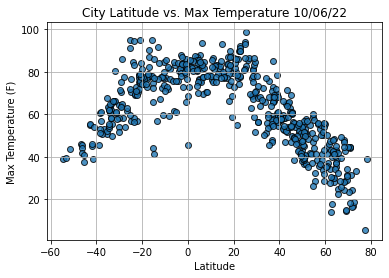

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

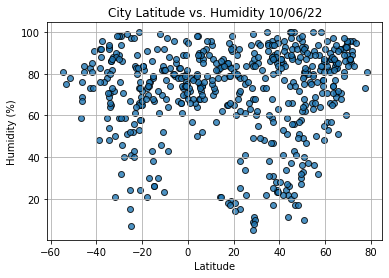

In [34]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

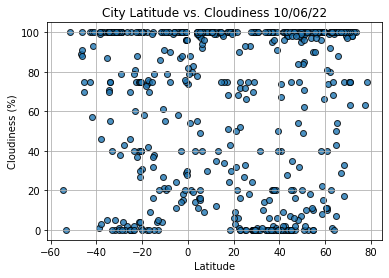

In [35]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

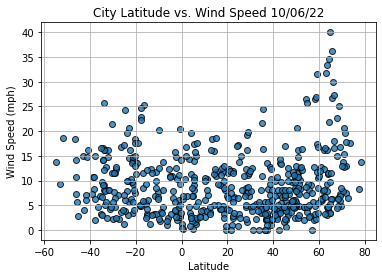

In [36]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [37]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [39]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

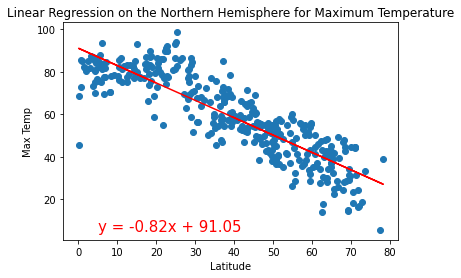

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(5,5))

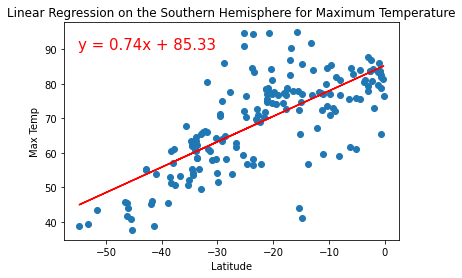

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-55,90))

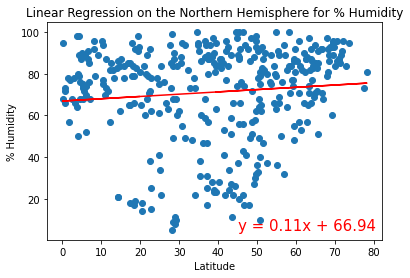

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(45,5))

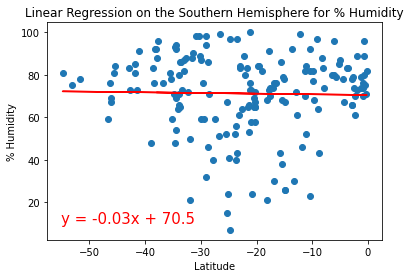

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-55,10))

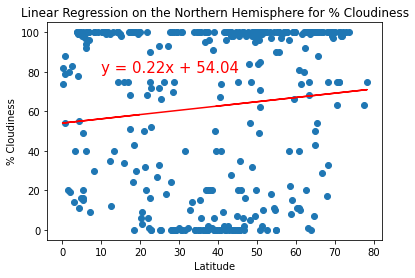

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,80))

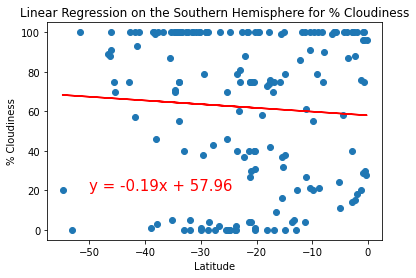

In [81]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,20))

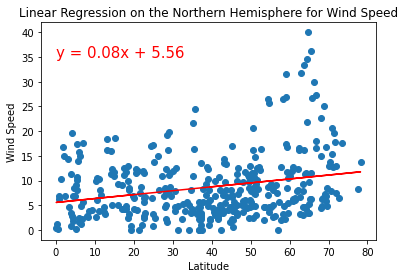

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(0,35))

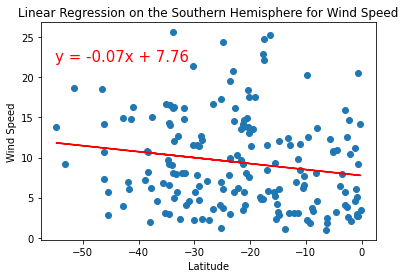

In [76]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-55,22))